In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.manifold import MDS
import matplotlib.animation as animation
from icecream import ic

## Still the test problem

Here almost all of the functions come from the tsp.ipynb file (see it for more explanations and sources)

In [2]:
CITIES = [
    "Rome",
    "Milan",
    "Naples",
    "Turin",
    "Palermo",
    "Genoa",
    "Bologna",
    "Florence",
    "Bari",
    "Catania",
    "Venice",
    "Verona",
    "Messina",
    "Padua",
    "Trieste",
    "Taranto",
    "Brescia",
    "Prato",
    "Parma",
    "Modena",
]
distance_matrix_test = np.load('lab2/test_problem.npy')

In [3]:
distance_matrix_test

array([[   0.  ,  476.88,  188.43,  523.85,  427.5 ,  400.4 ,  303.01,
         230.91,  374.62,  536.38,  393.68,  411.33,  487.59,  392.75,
         429.09,  428.45,  444.27,  247.22,  366.89,  330.58],
       [ 476.88,    0.  ,  657.51,  125.52,  886.96,  119.26,  200.7 ,
         249.46,  786.94, 1011.07,  243.8 ,  140.56,  964.47,  209.75,
         357.67,  858.83,   80.1 ,  232.33,  115.75,  163.8 ],
       [ 188.43,  657.51,    0.  ,  711.49,  314.03,  587.74,  470.35,
         408.13,  220.54,  378.4 ,  534.25,  575.  ,  315.45,  542.28,
         534.96,  254.93,  616.29,  425.21,  544.03,  502.49],
       [ 523.85,  125.52,  711.49,    0.  ,  905.38,  123.92,  295.5 ,
         318.16,  864.93, 1042.55,  364.59,  261.88, 1005.05,  330.16,
         480.03,  932.46,  204.29,  301.66,  210.01,  259.53],
       [ 427.5 ,  886.96,  314.03,  905.38,    0.  ,  790.5 ,  729.04,
         653.02,  449.14,  165.64,  819.1 ,  837.52,  191.9 ,  819.94,
         838.42,  424.21,  865.79,  66

In [4]:
def isMatrixSymmetric(matrix):
    return np.allclose(matrix, matrix.T)

def doesMatrixHaveZeroDiagonal(matrix):
    return np.allclose(matrix.diagonal(), 0.0)

def doesMatrixHaveNegativeValues(matrix):
    return np.any(matrix < 0)

def isTriangleInequalitySatisfied(matrix):
    n = matrix.shape[0]
    for i in range(n):
        for j in range(n):
            if i == j:
                continue
            for k in range(n):
                if i == k or j == k:
                    continue
                if matrix[i, k] > matrix[i, j] + matrix[j, k]:
                    return False
    return True

In [5]:
def isValidSolution(solution_matrix):
    n = solution_matrix.shape[0]
    for i in range(n):
        if np.sum(solution_matrix[i, :]) != 1:
            return False
        if np.sum(solution_matrix[:, i]) != 1:
            return False
    if solution_matrix.trace() != 0:
        return False
    graph = nx.DiGraph(solution_matrix)
    cycles = list(nx.simple_cycles(graph))
    if len(cycles) != 1 and len(cycles[0]) != n:
        return False
    return True

In [ ]:
def totalDistance(path, distance_matrix):
    total_distance = 0
    n = len(path)
    for i in range(n):
        j = (i + 1) % n
        total_distance += distance_matrix[path[i], path[j]]
    return total_distance

# Works with swap2opt
# Only works when distance_matrix is symmetric
# See file tsp.ipynb for detailed explanation
def fastDistance(path, n_cities, distance_matrix, current_distance, i, j):
    if i == j:
        return current_distance
    
    # Ensure i < j for consistent indexing
    if i > j:
        i, j = j, i
    
    # Handle edge case where segment is too small (no reversal happens)
    if j - i < 2:
        return current_distance
    
    city_at_i = path[i]
    city_at_i_plus_1 = path[i + 1]
    city_at_j_minus_1 = path[j - 1]
    city_at_j = path[j % n_cities]
    
    new_distance = current_distance
    new_distance -= distance_matrix[city_at_i][city_at_i_plus_1]
    new_distance -= distance_matrix[city_at_j_minus_1][city_at_j]
    new_distance += distance_matrix[city_at_i][city_at_j_minus_1]
    new_distance += distance_matrix[city_at_i_plus_1][city_at_j]    
    return new_distance

In [7]:
def generateRandomSolutionArray(num_cities):
    solution = list(range(num_cities))
    np.random.shuffle(solution)
    return solution

def generateGreadySolutionArray(distance_matrix, start_city=0):
    n = distance_matrix.shape[0]
    unvisited = set(range(n))
    current_city = start_city
    path = [current_city]
    unvisited.remove(current_city)
    while unvisited:
        list_available_cities_distances = [(distance_matrix[current_city][city], city) for city in unvisited]
        next_city = min(list_available_cities_distances, key=lambda x: x[0])[1]
        path.append(next_city)
        unvisited.remove(next_city)
        current_city = next_city
    return path

def generateUltraGreadySolutionArray(distance_matrix):
    n = distance_matrix.shape[0]
    path_len = float('inf')
    best_path = None
    for i in range(n):
        path = generateGreadySolutionArray(distance_matrix, start_city=i)
        current_path_len = totalDistance(path, distance_matrix)
        if current_path_len < path_len:
            path_len = current_path_len
            best_path = path
    return best_path

In [8]:
D_MATRIX = distance_matrix_test
n = D_MATRIX.shape[0]
ic(isMatrixSymmetric(D_MATRIX))
ic(doesMatrixHaveZeroDiagonal(D_MATRIX))
ic(doesMatrixHaveNegativeValues(D_MATRIX))
ic(isTriangleInequalitySatisfied(D_MATRIX))

random_path = generateRandomSolutionArray(n)
ic(totalDistance(random_path, D_MATRIX))
greedy_path = generateGreadySolutionArray(D_MATRIX, start_city=0)
ic(totalDistance(greedy_path, D_MATRIX))
ultra_greedy_path = generateUltraGreadySolutionArray(D_MATRIX)
ic(totalDistance(ultra_greedy_path, D_MATRIX))

ic| isMatrixSymmetric(D_MATRIX): True
ic| doesMatrixHaveZeroDiagonal(D_MATRIX): True
ic| doesMatrixHaveNegativeValues(D_MATRIX): np.False_
ic| isTriangleInequalitySatisfied(D_MATRIX): True
ic| totalDistance(random_path, D_MATRIX): np.float64(9313.719999999998)
ic| totalDistance(greedy_path, D_MATRIX): np.float64(3349.95)
ic| totalDistance(ultra_greedy_path, D_MATRIX): np.float64(3309.3700000000003)


np.float64(3309.3700000000003)

In [9]:
def distanceMatrixToCoordinates(D):
    n = D.shape[0]    # distance_matrix is n x n

    M = np.zeros_like(D)
    for i in range(n):
        for j in range(n):
            M[i, j] = 0.5 * (D[0, j]**2 + D[i, 0]**2 - D[i, j]**2)
    # Matrix decomposition
    eigenvalues, eigenvectors = np.linalg.eig(M)
    assert np.allclose(eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T, M)

    X = eigenvectors @ np.diag(np.sqrt(np.abs(eigenvalues)))
    
    # Indices where eigenvalues are too small (considered as zero or negative)
    small_eigenvalue_indices = np.where(np.abs(eigenvalues) < 1e-10)[0]
    X = np.delete(X, small_eigenvalue_indices, axis=1)
    
    return X

def reduceDimensionality(coordinates, target_dim=2):
    mds = MDS(n_components=target_dim, dissimilarity='euclidean', random_state=42)
    reduced_coordinates = mds.fit_transform(coordinates)
    return reduced_coordinates

def plotCities2D(coordinates_2D, city_names = None, title = ""):
    plt.figure(figsize=(6, 4))
    plt.scatter(coordinates_2D[:, 0], coordinates_2D[:, 1], color='blue')
    
    num_cities = coordinates_2D.shape[0]
    
    if city_names is not None:
        assert len(city_names) == num_cities, "Number of city names must match number of cities."
        for i, city in enumerate(city_names):
            plt.text(coordinates_2D[i, 0], coordinates_2D[i, 1], city, fontsize=9, ha='right')
    
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    
def plotPath2D(coordinates_2D, path, city_names = None, title = ""):
    n = len(path)
    plotCities2D(coordinates_2D, city_names, title)
    for i in range(n):
        start_city = path[i]
        end_city = path[(i + 1) % n]
        plt.plot(
            [coordinates_2D[start_city, 0], coordinates_2D[end_city, 0]],
            [coordinates_2D[start_city, 1], coordinates_2D[end_city, 1]],
            color='blue'
        )
        
def reduceAndPlotPath(distance_matrix, path, city_names = None, title = ""):
    n = distance_matrix.shape[0]
    coordinates = distanceMatrixToCoordinates(distance_matrix)
    reduced_coordinates = reduceDimensionality(coordinates, target_dim=2)
    plotPath2D(reduced_coordinates, path, city_names, title)

/home/niccolo/Torino/env/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/home/niccolo/Torino/env/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/home/niccolo/Torino/env/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/home/niccolo/Torino/env/lib/python3.13/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


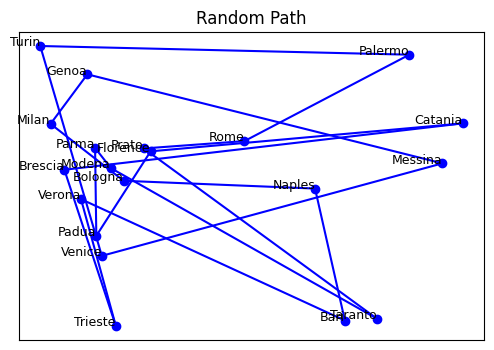

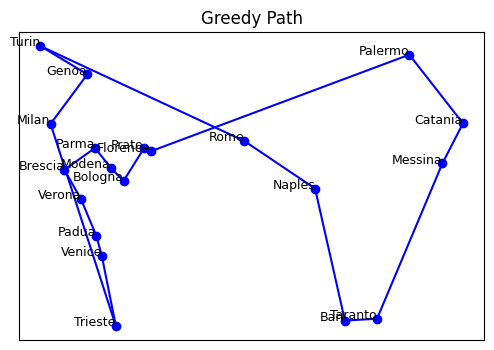

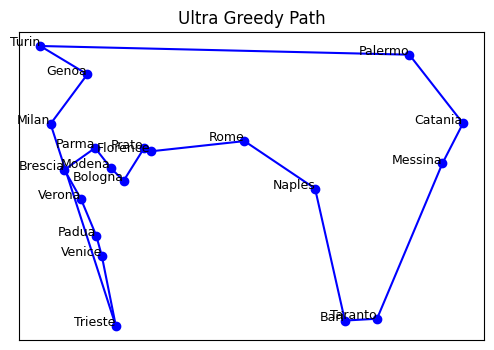

In [10]:
reduceAndPlotPath(D_MATRIX, random_path, CITIES, title="Random Path")
reduceAndPlotPath(D_MATRIX, greedy_path, CITIES, title="Greedy Path")
reduceAndPlotPath(D_MATRIX, ultra_greedy_path, CITIES, title="Ultra Greedy Path")

In [11]:
def swap2opt(path, i, j):
    new_solution = path.copy()
    new_solution[i+1:j] = path[i+1:j][::-1]
    return new_solution

def swapRandom(path, i, j):
    new_solution = path.copy()
    new_solution[i], new_solution[j] = path[j], path[i]
    return new_solution

In [12]:
# Test to understand the issue
test_path = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Case 1: i < j
i, j = 2, 7
print(f"Case 1: i={i}, j={j} (i < j)")
print(f"Original path: {test_path}")
new_path_1 = swap2opt(test_path, i, j)
print(f"After swap2opt: {new_path_1}")
print(f"Segment reversed: path[{i+1}:{j}] = {test_path[i+1:j]}")
print()

# Case 2: i > j
i, j = 7, 2
print(f"Case 2: i={i}, j={j} (i > j)")
print(f"Original path: {test_path}")
new_path_2 = swap2opt(test_path, i, j)
print(f"After swap2opt: {new_path_2}")
print(f"Segment reversed: path[{i+1}:{j}] = {test_path[i+1:j]} (empty slice!)")
print(f"Path changed: {test_path != new_path_2}")

Case 1: i=2, j=7 (i < j)
Original path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
After swap2opt: [0, 1, 2, 6, 5, 4, 3, 7, 8, 9]
Segment reversed: path[3:7] = [3, 4, 5, 6]

Case 2: i=7, j=2 (i > j)
Original path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
After swap2opt: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Segment reversed: path[8:2] = [] (empty slice!)
Path changed: False


In [19]:
def simulatedAnnealing(distance_matrix,
                       initial_solution_array,
                       swap,
                       initial_temp=1000,
                       cooling_rate=0.999,
                       max_iterations=10000,
                       enable_history=True,
                       enable_distance_evolution=True):
    assert isMatrixSymmetric(distance_matrix), "Distance matrix must be symmetric."
    assert doesMatrixHaveZeroDiagonal(distance_matrix), "Distance matrix must have zero diagonal."
    
    n = distance_matrix.shape[0]
    current_solution = initial_solution_array.copy()
    current_distance = totalDistance(current_solution, distance_matrix)
    best_solution = current_solution.copy()
    best_distance = current_distance
    temp = initial_temp
    evolution_distance = []
    evolution_history = []

    for iteration in range(max_iterations):
        i, j = np.random.choice(n, 2, replace=False)
        
        # Ensure i < j for consistent behavior between swap2opt and fastDistance
        if i > j:
            i, j = j, i
        
        new_solution = swap(current_solution, i, j)
        # new_distance = totalDistance(new_solution, distance_matrix)
        new_distance = fastDistance(current_solution, n, distance_matrix, current_distance, i, j)
        # assert np.isclose(new_distance, new_distance2), f"Fast distance calculation error at iteration {iteration}: {new_distance} vs {new_distance2}"

        if new_distance < current_distance or np.random.rand() < np.exp(-(new_distance - current_distance) / temp):
            current_solution = new_solution
            current_distance = new_distance
            if current_distance < best_distance:
                best_solution = current_solution.copy()
                best_distance = current_distance
                
            temp *= cooling_rate
            
        if enable_history:
            evolution_history.append(current_solution.copy()) 
        if enable_distance_evolution:   
            evolution_distance.append(current_distance)

    return best_solution, best_distance, evolution_history, evolution_distance

In [20]:
def plotEvolution(distance_evolution, title=""):
    plt.figure(figsize=(6, 4))
    plt.plot(distance_evolution, color='blue')
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Best Distance")
    plt.grid()

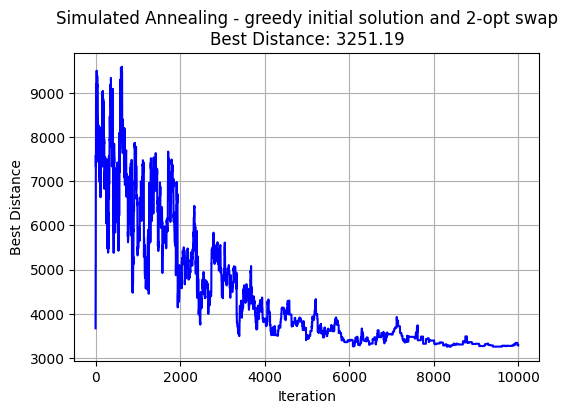

In [21]:
path, dist, history, dist_evolution = simulatedAnnealing(
    D_MATRIX,
    ultra_greedy_path,
    swap=swap2opt)

plotEvolution(dist_evolution, title=f"Simulated Annealing - greedy initial solution and 2-opt swap\nBest Distance: {dist:.2f}")
# Best distance found: 3227.75

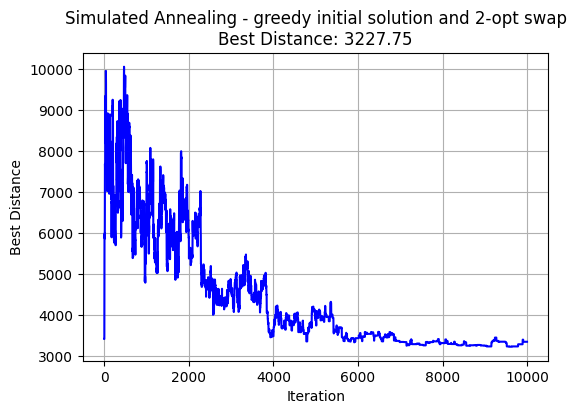

In [22]:
# Other swap function
path_gready_init, dist_gready_init, history_gready_init, dist_evolution_gready_init = simulatedAnnealing(
    D_MATRIX,
    ultra_greedy_path,
    swap=swap2opt)

plotEvolution(dist_evolution_gready_init, title=f"Simulated Annealing - greedy initial solution and 2-opt swap\nBest Distance: {dist_gready_init:.2f}")
# Best distance found: 2823.79

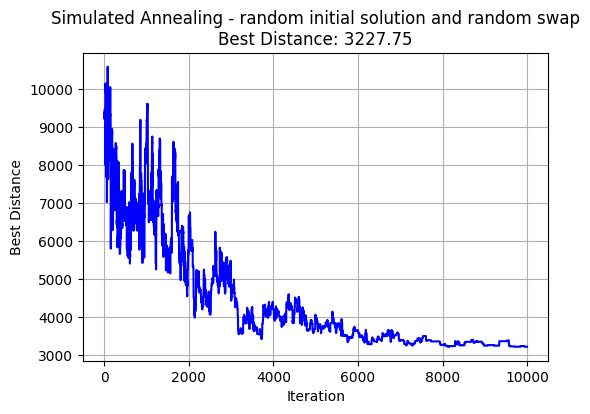

In [18]:
# swapRandom seems to work better
# Lets try the random solution
path_rnd_init, dist_rnd_init, history_rnd_init, dist_evolution_rnd_init = simulatedAnnealing(
    D_MATRIX,
    random_path,
    swap=swap2opt)

plotEvolution(dist_evolution_rnd_init, title=f"Simulated Annealing - random initial solution and random swap\nBest Distance: {dist_rnd_init:.2f}")
# Best distance found: 2823.79

In [ ]:
# This function is entirely AI generated
def animate_tsp_evolution(coords_2D,
                          initial_solution,
                          evolution_solutions,
                          final_solution,
                          distance_matrix,
                          city_names=None,
                          gif_path='tsp_evolution.gif',
                          n_frames=120,
                          fps=10,
                          interval=100,
                          figsize=(10, 8),
                          marker_color='blue',
                          line_color='tab:blue'):
    """
    Create and save a GIF animating TSP route evolution.
    Parameters:
      - coords_2D: (n,2) array of city coordinates
      - initial_solution: list/array of city indices (first frame)
      - evolution_solutions: list of solutions (each a list/array) to sample for intermediate frames
      - final_solution: list/array of city indices (last frame)
      - distance_matrix: matrix used by totalDistance()
      - city_names: optional list of city names for annotations
      - gif_path, n_frames, fps, interval, figsize, marker_color, line_color: presentation params
    Returns:
      - path to saved GIF (gif_path)
    """
    # prepare frames (sample evolution_solutions evenly)
    evol = [] if evolution_solutions is None else list(evolution_solutions)
    n_evol = len(evol)
    # aim to include initial + sampled evol + final
    n_middle = max(0, n_frames - 2)
    if n_evol == 0 or n_middle == 0:
        sampled = []
    else:
        # include both ends of evolution range if possible
        sampled_indices = np.unique(np.linspace(0, max(0, n_evol - 1), min(n_middle, n_evol), dtype=int))
        sampled = [evol[i] for i in sampled_indices]
    frames = [initial_solution] + sampled + [final_solution]
    # ensure list of lists of ints
    frames = [list(map(int, np.asarray(f).tolist())) for f in frames]

    coords = np.asarray(coords_2D)
    if coords.ndim != 2 or coords.shape[1] < 2:
        raise ValueError("coords_2D must be an (n,2) array-like.")

    x = coords[:, 0]
    y = coords[:, 1]

    def draw_route(ax, route):
        ax.scatter(x, y, color=marker_color, zorder=2)
        if city_names is not None:
            for i, name in enumerate(city_names):
                ax.text(x[i], y[i], name, fontsize=9, ha='right', zorder=3)
        seq = list(route) + [route[0]]
        seq = np.array(seq, dtype=int)
        ax.plot(coords[seq, 0], coords[seq, 1], color=line_color, linewidth=2, zorder=1)
        ax.set_aspect('equal', 'box')
        ax.grid(True)

    fig, ax = plt.subplots(figsize=figsize)

    def update(frame_idx):
        ax.clear()
        route = frames[frame_idx]
        draw_route(ax, route)
        dist_val = totalDistance(route, distance_matrix)
        ax.set_title(f'Frame {frame_idx+1}/{len(frames)}  —  Distance: {dist_val:.2f}')

    anim = animation.FuncAnimation(fig, update, frames=len(frames), interval=interval)
    writer = animation.PillowWriter(fps=fps)
    anim.save(gif_path, writer=writer)
    plt.close(fig)
    return gif_path

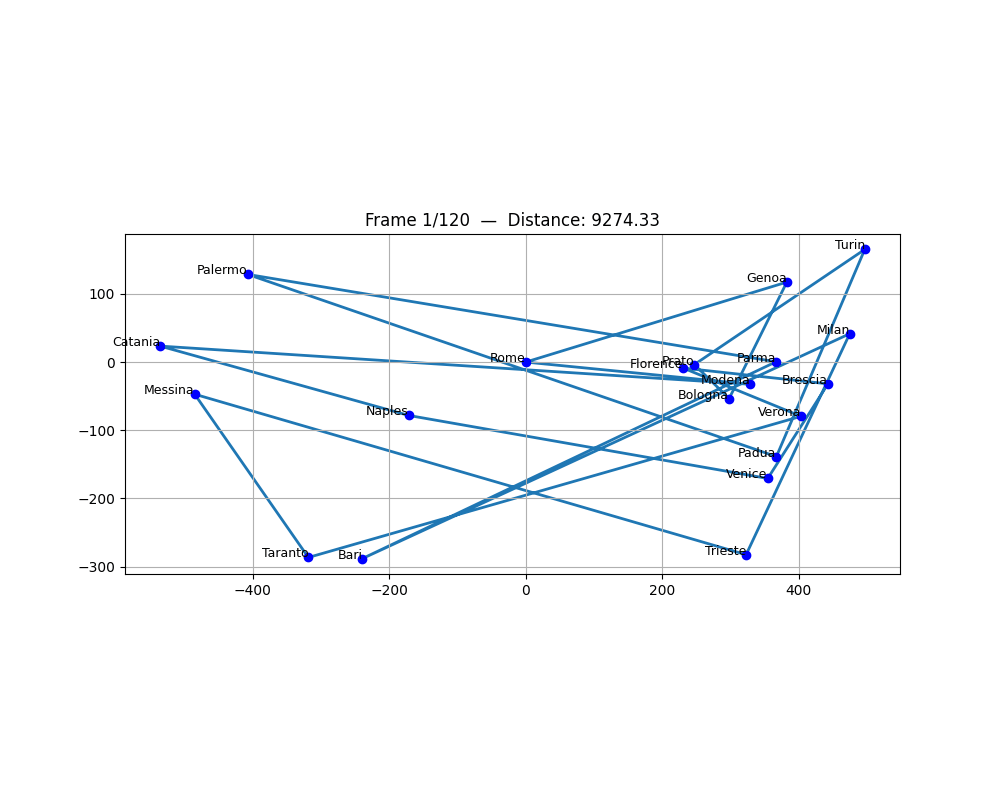

In [ ]:
random_path_evolution_gif = animate_tsp_evolution(
    distanceMatrixToCoordinates(D_MATRIX),
    random_path,
    history,
    path,
    D_MATRIX,
    city_names=CITIES,
    gif_path='random_path_evolution.gif',
    n_frames=120,
    fps=10,
    interval=100,
    figsize=(10, 8),
    marker_color='blue',
    line_color='tab:blue'
)

from IPython.display import Image, display
display(Image(filename='random_path_evolution.gif'))


In [ ]:
gready_path_evolution_gif = animate_tsp_evolution(
    distanceMatrixToCoordinates(D_MATRIX),
    ultra_greedy_path,
    history_gready_init,
    path_gready_init,
    D_MATRIX,
    city_names=CITIES,
    gif_path='gready_path_evolution.gif',
    n_frames=120,
    fps=10,
    interval=100,
    figsize=(10, 8),
    marker_color='blue',
    line_color='tab:blue'
)

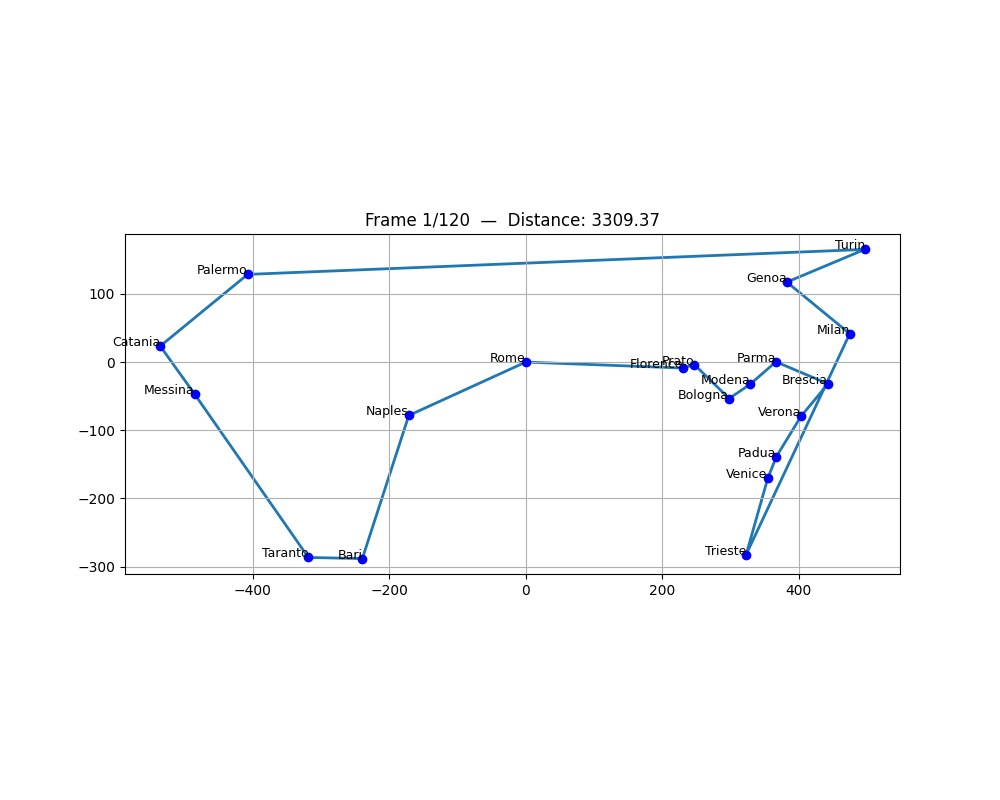

In [ ]:
display(Image(filename='gready_path_evolution.gif'))

# OTHER PROBLEMS

In [ ]:
problem_g10 = np.load('lab2/problem_g_10.npy')
problem_g20 = np.load('lab2/problem_g_20.npy')
problem_g50 = np.load('lab2/problem_g_50.npy')
problem_g100 = np.load('lab2/problem_g_100.npy')
problem_g200 = np.load('lab2/problem_g_200.npy')
problem_g500 = np.load('lab2/problem_g_500.npy')
problem_g1000 = np.load('lab2/problem_g_1000.npy')

problem_r1_10 = np.load('lab2/problem_r1_10.npy')
problem_r1_20 = np.load('lab2/problem_r1_20.npy')
problem_r1_50 = np.load('lab2/problem_r1_50.npy')
problem_r1_100 = np.load('lab2/problem_r1_100.npy')
problem_r1_200 = np.load('lab2/problem_r1_200.npy')
problem_r1_500 = np.load('lab2/problem_r1_500.npy')
problem_r1_1000 = np.load('lab2/problem_r1_1000.npy')

problem_r2_10 = np.load('lab2/problem_r2_10.npy')
problem_r2_20 = np.load('lab2/problem_r2_20.npy')
problem_r2_50 = np.load('lab2/problem_r2_50.npy')
problem_r2_100 = np.load('lab2/problem_r2_100.npy')
problem_r2_200 = np.load('lab2/problem_r2_200.npy')
problem_r2_500 = np.load('lab2/problem_r2_500.npy')
problem_r2_1000 = np.load('lab2/problem_r2_1000.npy')

problems_g = [problem_g10, problem_g20, problem_g50, problem_g100, problem_g200, problem_g500, problem_g1000]
problems_r1 = [problem_r1_10, problem_r1_20, problem_r1_50, problem_r1_100, problem_r1_200, problem_r1_500, problem_r1_1000]
problems_r2 = [problem_r2_10, problem_r2_20, problem_r2_50, problem_r2_100, problem_r2_200, problem_r2_500, problem_r2_1000]

In [ ]:
for i, problem in enumerate(problems_g):
    n_cities = problem.shape[0]
    print(f"Problem g_{n_cities}:")
    print(f"  - Symmetric: {isMatrixSymmetric(problem)}")
    print(f"  - Zero Diagonal: {doesMatrixHaveZeroDiagonal(problem)}")
    print(f"  - Negative Values: {doesMatrixHaveNegativeValues(problem)}")
    # print(f"  - Triangle Inequality Satisfied: {isTriangleInequalitySatisfied(problem)}")
    # Otherwise it would take too long
print(f"g200 Triangle Inequality Satisfied: {isTriangleInequalitySatisfied(problem_g200)}")

Problem g_10:
  - Symmetric: True
  - Zero Diagonal: True
  - Negative Values: False
Problem g_20:
  - Symmetric: True
  - Zero Diagonal: True
  - Negative Values: False
Problem g_50:
  - Symmetric: True
  - Zero Diagonal: True
  - Negative Values: False
Problem g_100:
  - Symmetric: True
  - Zero Diagonal: True
  - Negative Values: False
Problem g_200:
  - Symmetric: True
  - Zero Diagonal: True
  - Negative Values: False
Problem g_500:
  - Symmetric: True
  - Zero Diagonal: True
  - Negative Values: False
Problem g_1000:
  - Symmetric: True
  - Zero Diagonal: True
  - Negative Values: False
g200 Triangle Inequality Satisfied: True


In [ ]:
for i, problem in enumerate(problems_r1):
    n_cities = problem.shape[0]
    print(f"Problem r1_{n_cities}:")
    print(f"  - Symmetric: {isMatrixSymmetric(problem)}")
    print(f"  - Zero Diagonal: {doesMatrixHaveZeroDiagonal(problem)}")
    print(f"  - Negative Values: {doesMatrixHaveNegativeValues(problem)}")
    print(f"  - Triangle Inequality Satisfied: {isTriangleInequalitySatisfied(problem)}")

Problem r1_10:
  - Symmetric: False
  - Zero Diagonal: True
  - Negative Values: False
  - Triangle Inequality Satisfied: False
Problem r1_20:
  - Symmetric: False
  - Zero Diagonal: True
  - Negative Values: False
  - Triangle Inequality Satisfied: False
Problem r1_50:
  - Symmetric: False
  - Zero Diagonal: True
  - Negative Values: False
  - Triangle Inequality Satisfied: False
Problem r1_100:
  - Symmetric: False
  - Zero Diagonal: True
  - Negative Values: False
  - Triangle Inequality Satisfied: False
Problem r1_200:
  - Symmetric: False
  - Zero Diagonal: True
  - Negative Values: False
  - Triangle Inequality Satisfied: False
Problem r1_500:
  - Symmetric: False
  - Zero Diagonal: True
  - Negative Values: False
  - Triangle Inequality Satisfied: False
Problem r1_1000:
  - Symmetric: False
  - Zero Diagonal: True
  - Negative Values: False
  - Triangle Inequality Satisfied: False


In [ ]:
for i, problem in enumerate(problems_r2):
    n_cities = problem.shape[0]
    print(f"Problem r2_{n_cities}:")
    print(f"  - Symmetric: {isMatrixSymmetric(problem)}")
    print(f"  - Zero Diagonal: {doesMatrixHaveZeroDiagonal(problem)}")
    print(f"  - Negative Values: {doesMatrixHaveNegativeValues(problem)}")
    print(f"  - Triangle Inequality Satisfied: {isTriangleInequalitySatisfied(problem)}")

Problem r2_10:
  - Symmetric: False
  - Zero Diagonal: False
  - Negative Values: True
  - Triangle Inequality Satisfied: False
Problem r2_20:
  - Symmetric: False
  - Zero Diagonal: False
  - Negative Values: True
  - Triangle Inequality Satisfied: False
Problem r2_50:
  - Symmetric: False
  - Zero Diagonal: False
  - Negative Values: True
  - Triangle Inequality Satisfied: False
Problem r2_100:
  - Symmetric: False
  - Zero Diagonal: False
  - Negative Values: True
  - Triangle Inequality Satisfied: False
Problem r2_200:
  - Symmetric: False
  - Zero Diagonal: False
  - Negative Values: True
  - Triangle Inequality Satisfied: False
Problem r2_500:
  - Symmetric: False
  - Zero Diagonal: False
  - Negative Values: True
  - Triangle Inequality Satisfied: False
Problem r2_1000:
  - Symmetric: False
  - Zero Diagonal: False
  - Negative Values: True
  - Triangle Inequality Satisfied: False


### Resume of proprieties of the problems

g problems:

  - Symmetric: True
  - Zero Diagonal: True
  - Negative Values: False
  - Triangle Inequality Satisfied: True

r1 problems:

  - Symmetric: False
  - Zero Diagonal: True
  - Negative Values: False
  - Triangle Inequality Satisfied: False

r2 problems:

  - Symmetric: False
  - Zero Diagonal: False
  - Negative Values: True
  - Triangle Inequality Satisfied: False

### Problem g_10

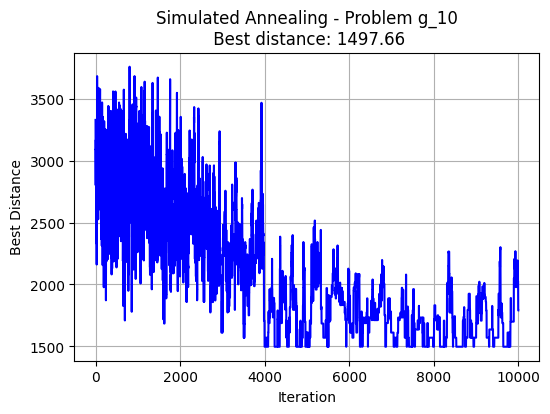

In [ ]:
path_g10, dist_g10, history_g10, dist_evol_g10  = simulatedAnnealing(
    problem_g10,
    generateRandomSolutionArray(problem_g10.shape[0]),
    swap=swapRandom,
    max_iterations=10000,
    enable_history=False)

plotEvolution(dist_evol_g10, title=f"Simulated Annealing - Problem g_10\n Best distance: {dist_g10:.2f}")
# Best distance found: 1497.66

### Problem g_20

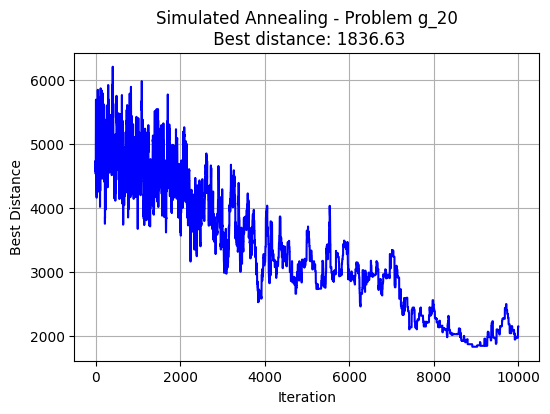

In [ ]:
path_g20, dist_g20, history_g20, dist_evol_g20  = simulatedAnnealing(
    problem_g20,
    generateRandomSolutionArray(problem_g20.shape[0]),
    swap=swapRandom,
    max_iterations=10000,
    enable_history=False)

plotEvolution(dist_evol_g20, title=f"Simulated Annealing - Problem g_20\n Best distance: {dist_g20:.2f}")
# Best distance found: 1755.51

### Problem g_50

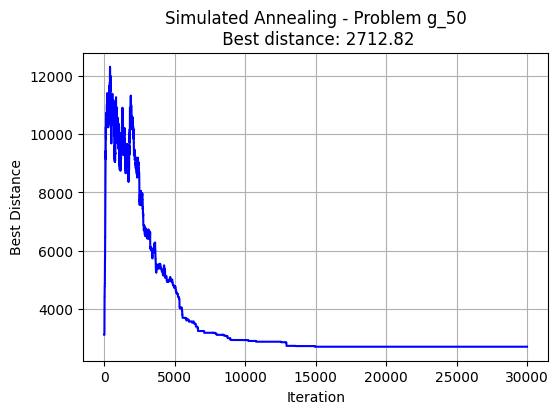

In [ ]:
path_g50, dist_g50, history_g50, dist_evol_g50  = simulatedAnnealing(
    problem_g50,
    # generateRandomSolutionArray(problem_g50.shape[0]),
    generateUltraGreadySolutionArray(problem_g50),
    swap=swap2opt,
    max_iterations=30000,  
    enable_history=False)

plotEvolution(dist_evol_g50, title=f"Simulated Annealing - Problem g_50\n Best distance: {dist_g50:.2f}")
# Best distance found: 2750.99

### Problem g_100

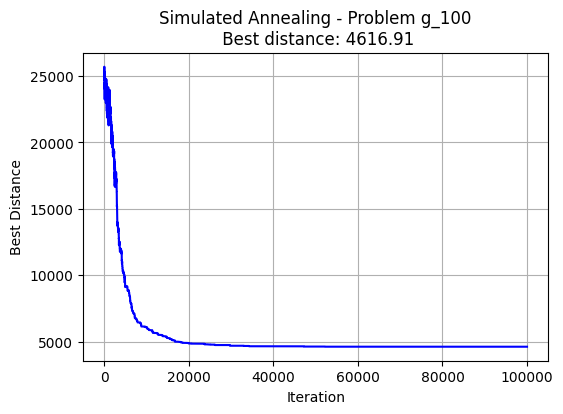

In [ ]:
path_g100, dist_g100, history_g100, dist_evol_g100  = simulatedAnnealing(
    problem_g100,
    generateRandomSolutionArray(problem_g100.shape[0]),
    # generateUltraGreadySolutionArray(problem_g100),
    swap=swap2opt,
    max_iterations=100000,
    enable_history=False)

plotEvolution(dist_evol_g100, title=f"Simulated Annealing - Problem g_100\n Best distance: {dist_g100:.2f}")
# Best distance found: 4307.48

### Problem g_200

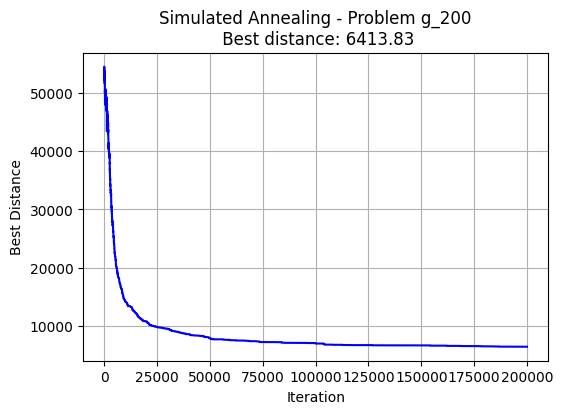

In [ ]:
path_g200, dist_g200, history_g200, dist_evol_g200  = simulatedAnnealing(
    problem_g200,
    generateRandomSolutionArray(problem_g200.shape[0]),
    max_iterations=200000,
    swap=swap2opt,
    enable_history=False)

plotEvolution(dist_evol_g200, title=f"Simulated Annealing - Problem g_200\n Best distance: {dist_g200:.2f}")
# Best distance found: 6214.47

/home/niccolo/Torino/env/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/niccolo/Torino/env/lib/python3.13/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/niccolo/Torino/env/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


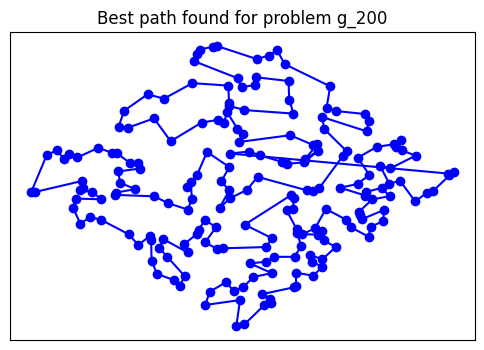

In [ ]:
plotPath2D(distanceMatrixToCoordinates(problem_g200), path_g200, title="Best path found for problem g_200")

### Problem g_500

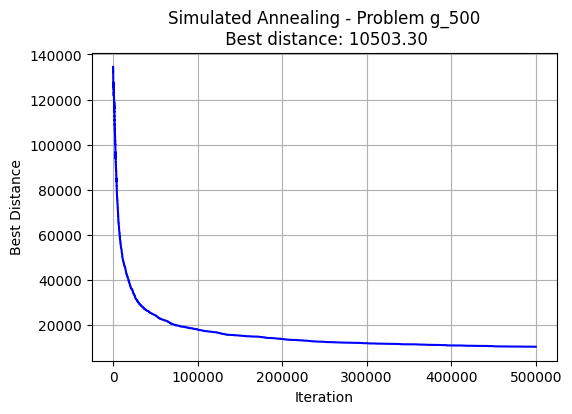

In [ ]:
path_g500, dist_g500, history_g500, dist_evol_g500  = simulatedAnnealing(
    problem_g500,
    generateRandomSolutionArray(problem_g500.shape[0]),
    max_iterations=500000,
    swap=swap2opt,
    enable_history=False)
plotEvolution(dist_evol_g500, title=f"Simulated Annealing - Problem g_500\n Best distance: {dist_g500:.2f}")
# Best distance found: 10701.56

### Problem g_1000

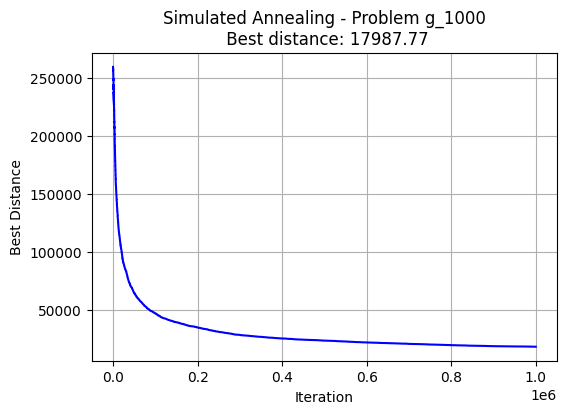

In [ ]:
path_g1000, dist_g1000, history_g1000, dist_evol_g1000  = simulatedAnnealing(
    problem_g1000,
    generateRandomSolutionArray(problem_g1000.shape[0]),
    max_iterations=1000000,
    swap=swap2opt,
    enable_history=False)

plotEvolution(dist_evol_g1000, title=f"Simulated Annealing - Problem g_1000\n Best distance: {dist_g1000:.2f}")
# Best distance found: 18133.82